# DARK CURRENT

#### THEY ARE ELECTRON PRODUCED BY THE HEAT OF THE DEVICE, CONSIDERED NEGLIGABLE VALUE, ALTHOUGH, SUBTRACTED. CHECK THE MASTER DARK IMAGE IN THIS CODE, IT SHOWS DARK CURRENT AS WHITE DOTS IN THE IMAGE.

NOTE THAT DARK CURRENT VALUES CONTAIN BIAS AUTOMATICALLY AS IT IS TESTED ON THE DEVICE AND CONTAINS READ NOISE. READ NOISE ARE RANDOM ELECTRONS APPEAR WHILE READING THE IMAGE ON A COMPUTER. IT CAN'T BE SUBTRACTED, IT IS THE UNCERTAINTITY OF THE DEVICE.

In [1]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
import glob
from astropy.visualization import hist
from photutils.aperture import CircularAperture
path_dark = "Bicocca-Tele.data/ngc_6946_for_29th_Sep_2025/DARK"
path_bias = "Bicocca-Tele.data/ngc_6946_for_29th_Sep_2025/BIAS"

In [2]:
with fits.open(path_bias +"/master_bias.fits") as hdu_bias:
  master_bias = hdu_bias[0].data
file_dark = sorted(glob.glob(path_dark +"/2025-09-25*300*.fits"))
data_dark = np.array([fits.getdata(f) for f in file_dark])     # The data here are reported in ADUs (Analog to digital unit)

master_dark = np.median(data_dark, axis=0) - master_bias

# Create a PrimaryHDU object from the master_dark data (Create a fits file)
hdu_dark = fits.PrimaryHDU(master_dark)
#HDUList object(Make a list file)
hdu_list_dark = fits.HDUList([hdu_dark])
#FITS file
hdu_list_dark.writeto(path_dark + "/master_dark_300.fits", overwrite=True)

In [3]:
with fits.open(path_dark + '/master_dark_300.fits') as dark:
    master_dark = dark[0].data

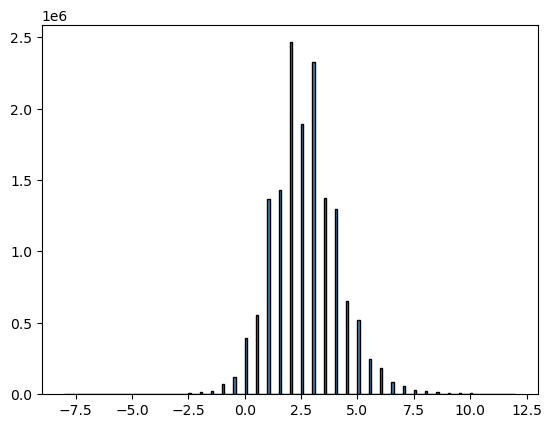

In [4]:
hist(master_dark.flatten(), bins=200 , color= 'steelblue', edgecolor='black', range= (-8,12))
plt.show()

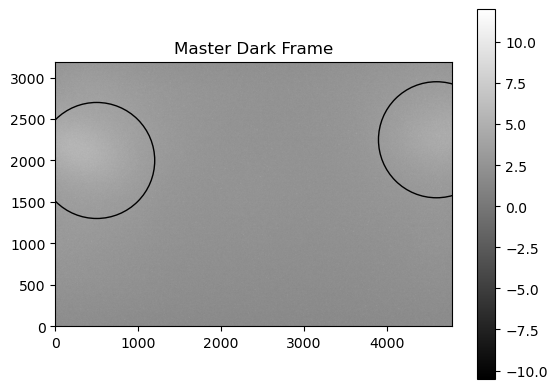

In [9]:
plt.imshow(master_dark, origin= 'lower',cmap='gray',clim = (-2.5,9)) 
CircularAperture([(500,2000),(4600,2250)], r = 700).plot()
plt.colorbar()
plt.title('Master Dark Frame')
plt.show()